In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image as pil_image
from tqdm import tqdm_notebook

% matplotlib inline

In [2]:
image = pil_image.open('input/marker_cut_rgb_512.png')
edges = np.load('edges.npy')

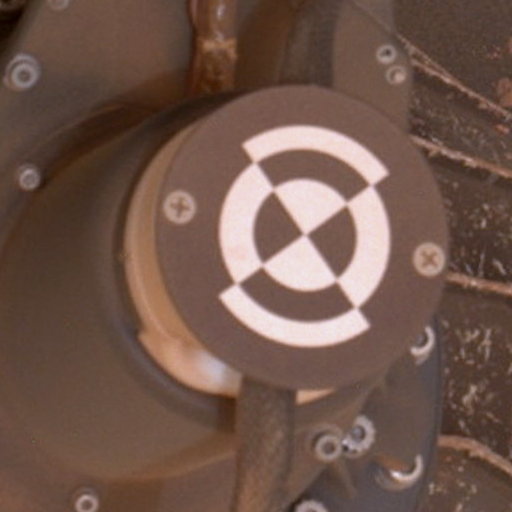

In [3]:
image

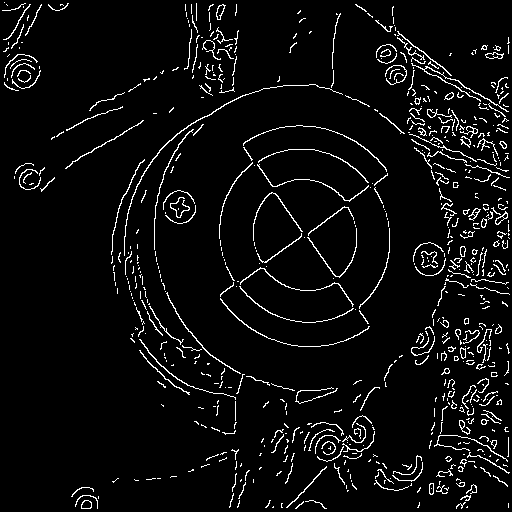

In [4]:
def show(im):
    # Plots numpy array as pil image
    return pil_image.fromarray(im.astype(np.uint8))


show(edges)

In [5]:
# Process image as numpy array
image_numpy = np.array(image)

In [6]:
def hough_transform(im, edges, thetas, distances, threshold=20):
    height, width, _ = im.shape
    accumulator = np.zeros((len(distances), len(thetas)))

    for i in tqdm_notebook(range(width)):
        for j in range(height):
            if edges[i, j]:
                for theta_index, theta in enumerate(thetas):
                    # Distance from the origin with given edge
                    dist = i * np.cos(theta) + j * np.sin(theta)

                    closest_dist_index = np.argmin(np.abs(distances - dist))
                    accumulator[closest_dist_index, theta_index] += 1
    return accumulator


# Set thetas range from -90°  to 89°
thetas = [np.deg2rad(degree) for degree in range(-90, 90)]

# Set distances with discretization 1
rho_max = int(np.hypot(image_numpy.shape[0], image_numpy.shape[1]))
distances = list(range(-rho_max, rho_max + 1))


acc = hough_transform(image_numpy, edges, thetas, distances)

### Image in hough space

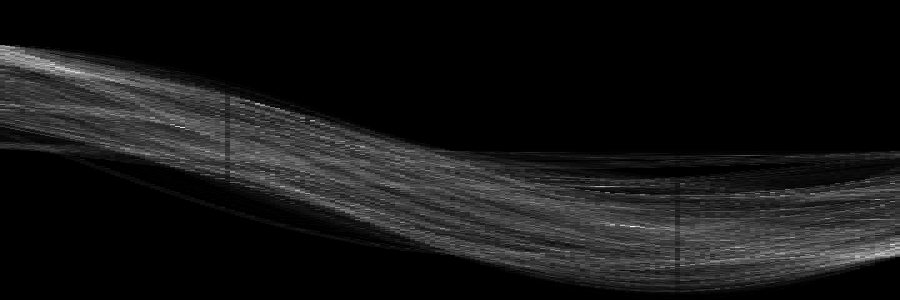

In [7]:
pil_image.fromarray(((acc / acc.max()) * 255).astype(np.uint8)).resize((900, 300))

### Get top 10 lines
For Hough Transforms, we will express lines in the Polar system. 
Hence, a line equation can be written as:

$$y=-\frac{\cos{\theta}}{\sin{\theta}} x+\frac{r}{\sin{\theta}}$$


In [8]:
top_i, top_j = np.unravel_index(np.argsort(-acc.flatten())[:10], acc.shape)

for i, j in zip(top_i, top_j):
    rho = distances[i]
    theta = thetas[j]
    k = -1 / np.tan(theta)
    b = rho / np.sin(theta)
    print(
        f"Value in hough space:  {acc[i,j]},  line:  y= {round(k,3)}*x + {round(b, 3)}"
    )

Value in hough space:  108.0,  line:  y= 0.7*x + 141.61
Value in hough space:  108.0,  line:  y= -1.376*x + 627.78
Value in hough space:  104.0,  line:  y= -1.428*x + 639.845
Value in hough space:  100.0,  line:  y= 0.249*x + 391.633
Value in hough space:  98.0,  line:  y= -1.428*x + 638.102
Value in hough space:  98.0,  line:  y= 0.7*x + 140.389
Value in hough space:  98.0,  line:  y= -1.0*x + 793.374
Value in hough space:  98.0,  line:  y= 0.231*x + 392.048
Value in hough space:  97.0,  line:  y= 0.249*x + 389.572
Value in hough space:  97.0,  line:  y= 0.727*x + 134.731


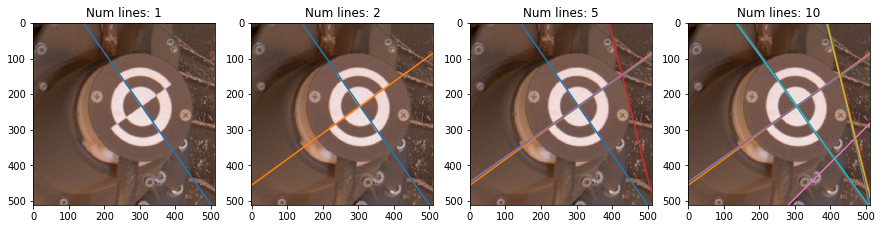

In [9]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15, 5)

lines = [1, 2, 5, 10]
xs = np.arange(image_numpy.shape[0])

for idx, line_count in enumerate(lines):
    axis = axes[idx]
    top_i, top_j = np.unravel_index(np.argsort(-acc.flatten())[:line_count], acc.shape)
    for i, j in zip(top_i, top_j):
        rho = distances[i]
        theta = thetas[j]
        k = -1 / np.tan(theta)
        b = rho / np.sin(theta)
        ys = k * xs + b
        axis.plot(ys, xs)
    axis.set_title(f"Num lines: {line_count}")
    axis.imshow(image_numpy)